In [2]:
import os
import nibabel as nib
import pylab as plt
import numpy as np

In [43]:
#nibabel boilerplate
from nibabel.testing import data_path
brain_file = os.path.join(data_path, "/Users/joachimpfefferkorn/repos/neuro_volume/media/sub-1001_T1w.nii")
brain_img = nib.load(brain_file)


# This data is a proxy, it points to an array on the disk
#`afine` is the affine array relating array coordinates from the image data to the coordinates in some RAS+ world coordinate system

In [4]:
#Gets the data from the proxy as a data array of 64bit float
brain_tensor = brain_img.get_fdata()
brain_tensor.shape


(135, 166, 100)

In [5]:
import functions

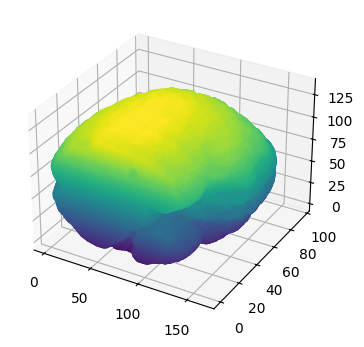

In [6]:
functions.show_3D_array(brain_tensor)

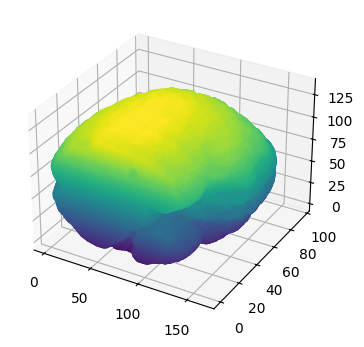

In [7]:
normalized_brain = np.array(functions.normalize_array(brain_tensor))
#functions.naive_sanity_check(normalized_brain, thresh= 0.1)
functions.show_3D_array(normalized_brain)

#plt.imshow(normalized_brain[:, :, normalized_brain.shape[2]].T, cmap='Greys_r')

In [ ]:
#print(normalized_brain[:][:][20])
print(normalized_brain.shape)
for i in range(normalized_brain.shape[2]):
    slice = normalized_brain[:][:][i]
    plt.imshow(slice, cmap='gray')
    plt.title(i)
    plt.show()

In [27]:
print(normalized_brain.shape)
print(normalized_brain.shape[2])

(135, 166, 100)
100


In [33]:
# Naive creation of tensor
# Recreating this to debug VDB issues on the blender side
mri_tensor = np.zeros(normalized_brain.shape)

for z_index in range(normalized_brain.shape[2]):
    image = normalized_brain[:, :, z_index]
    # plt.imshow(image, cmap='gray')
    # plt.title(z_index)
    # plt.show()


    for row_index, row in enumerate(image):
        for col_index, _ in enumerate(row):
            density = image[row_index][col_index]
            mri_tensor[row_index][col_index][z_index] = density

In [42]:
np.save('naive_tensor', mri_tensor)